In [4]:
#import necessary libraries
from keras.applications.vgg19 import VGG19    #by using Keras, we can import pre-trained model : VGG19
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Flatten
from keras.datasets import cifar10            #Cıfar10 dataset is embedded into the keras, we can automatically import
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
numberOfClass = 10   #number of our objects

In [3]:
#Load dataset into variables.For example, For training: x_train is our images and y_train is our labels
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
print("x_train shape",x_train.shape)
print("train sample:",x_train.shape[0])
#by looking at shape, we can say that 50000 samples, each has 32x32 resolution, 3 is channel number (RGB)


x_train shape (50000, 32, 32, 3)
train sample: 50000


In [4]:
y_train = to_categorical(y_train, numberOfClass) #we use one-hot encoding with the size of number of classes.
y_test = to_categorical(y_test, numberOfClass)

In [5]:
input_shape = x_train.shape[1:]   #our input shape and when we build model, we can use this variable.

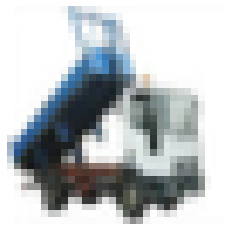

In [6]:
# visualize one of images.
plt.imshow(x_train[5511].astype(np.uint8))
plt.axis("off")
plt.show()

In [7]:
# Increase dimension because our default input size of model 48x48x3. Therefore, we need to resize our images from 32x32 to 48x48
def resize_img(img):
    numberOfImage = img.shape[0]
    new_array = np.zeros((numberOfImage, 48,48,3))
    for i in range(numberOfImage):
        new_array[i] = cv2.resize(img[i,:,:,:],(48,48))
    return new_array

In [8]:
x_train = resize_img(x_train)   #our resized data set
x_test = resize_img(x_test)
print("increased dim x_train: ",x_train.shape)  #shape is changes

increased dim x_train:  (50000, 48, 48, 3)


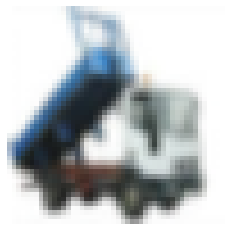

In [9]:
plt.figure()
plt.imshow(x_train[5511].astype(np.uint8))
plt.axis("off")
plt.show()   #our resized image (bigger than the previous)

In [10]:
vgg = VGG19(include_top = False, weights = "imagenet", input_shape = (48,48,3))   #load model and summary it
print(vgg.summary())
print(type(vgg))


Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0    

In [11]:
vgg_layer_list = vgg.layers
vgg_layer_list   #this list hold the all layers in our model.

In [12]:
model = Sequential()    #we create our model, named "model" and add all layers into the our model. but vgg19 doesn't include
#flatten and dense layers. we will add according to the our dataset. ın this file, we have 10 classes.
for layer in vgg_layer_list:
    model.add(layer)

In [13]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 12, 12, 256)      

In [14]:
for layers in model.layers:
    layers.trainable = False    #we do not need to train again previous layers. because they have already trained.

In [15]:
# fully conv layers are added.
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(numberOfClass, activation= "softmax"))   #our output neuron number is actuallu number of classes. therefore, our
#softmax function produce probability vector with the size of 10.

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 12, 12, 256)      

In [16]:
model.compile(loss = "categorical_crossentropy",   #model compile parameters. all can be changed.
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [17]:
#training process. If you wish, you can try with different number of epoch etc. "hist" variable is important and stand for the history.
#we can reach accuracy and loss by using this dictionary below.
hist = model.fit(x_train, y_train, 
                 validation_split = 0.2, epochs = 20, 
                 batch_size = 1000)



Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 898s 22ms/step - loss: 8.8736 - accuracy: 0.4025 - val_loss: 5.2619 - val_accuracy: 0.4751
Epoch 2/20
40000/40000 [==============================] - 882s 22ms/step - loss: 4.7017 - accuracy: 0.4932 - val_loss: 3.5932 - val_accuracy: 0.5340
Epoch 3/20
40000/40000 [==============================] - 919s 23ms/step - loss: 3.7427 - accuracy: 0.5151 - val_loss: 3.6993 - val_accuracy: 0.5020
Epoch 4/20
40000/40000 [==============================] - 939s 23ms/step - loss: 3.3253 - accuracy: 0.5193 - val_loss: 2.7818 - val_accuracy: 0.5401
Epoch 5/20
40000/40000 [==============================] - 899s 22ms/step - loss: 3.1301 - accuracy: 0.5214 - val_loss: 3.3582 - val_accuracy: 0.4941
Epoch 6/20
40000/40000 [==============================] - 904s 23ms/step - loss: 2.9058 - accuracy: 0.5275 - val_loss: 3.0734 - val_accuracy: 0.5264
Epoch 7/20
40000/40000 [==============================]

In [22]:
score = model.evaluate(x_test, y_test,    #we can evaluate the success of our model. for now, I trained only 20 epoch and this is not necesssary as you seen. 
                       batch_size=32, verbose=1)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 186s 19ms/step

Test score: 1.7055745908737183
Test accuracy: 0.5435000061988831


In [23]:
#save entire model
model.save('CIFAR10-20epoch.h5')

In [24]:
#%%  model save only weihts
model.save_weights("CIFAR10-20epochweights.h5")

In [25]:
print(hist.history.keys())  #these keys give us the model perfrmance and plot them

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


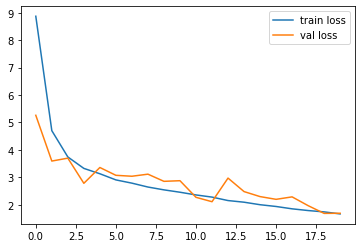

In [26]:
#%%
plt.plot(hist.history["loss"], label = "train loss")
plt.plot(hist.history["val_loss"], label = "val loss")
plt.legend()
plt.show()

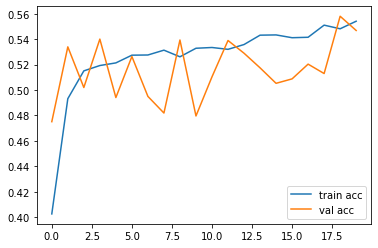

In [27]:
plt.figure()
plt.plot(hist.history["accuracy"], label = "train acc")
plt.plot(hist.history["val_accuracy"], label = "val acc")
plt.legend()
plt.show()

In [28]:
#%% save model history in different ways
import pandas as pd
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(hist.history) 

# save to json:  
hist_json_file = 'transfer_learning_vgg19_cfar10.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv: 
hist_csv_file = 'transfer_learning_vgg19_cfar10.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

hist_df

,val_loss,val_accuracy,loss,accuracy
0,5.261930,0.4751,8.873649,0.402500
1,3.593234,0.5340,4.701705,0.493200
2,3.699279,0.5020,3.742661,0.515100
3,2.781819,0.5401,3.325340,0.519300
4,3.358203,0.4941,3.130097,0.521375
5,3.073381,0.5264,2.905805,0.527450
6,3.039353,0.4950,2.787483,0.527600
7,3.114985,0.4819,2.645786,0.531400
8,2.853448,0.5394,2.542896,0.526175
9,2.876687,0.4796,2.456466,0.532900


In [29]:
#%% load hstory from thr different files(it is saved in previous cell)
import json, codecs
with codecs.open("transfer_learning_vgg19_cfar10.json","r",encoding = "utf-8") as f:
    historyFile = json.loads(f.read())

    
historyFile

{'val_loss': {'0': 5.2619301319,
  '1': 3.5932338953,
  '2': 3.6992794275,
  '3': 2.7818194628,
  '4': 3.3582027435,
  '5': 3.0733811378,
  '6': 3.0393529177,
  '7': 3.1149845839,
  '8': 2.853447938,
  '9': 2.8766870737,
  '10': 2.2710261583,
  '11': 2.1106069684,
  '12': 2.9718587637,
  '13': 2.4799608707,
  '14': 2.2973158598,
  '15': 2.1974089622,
  '16': 2.2869931459,
  '17': 1.967097199,
  '18': 1.6844415188,
  '19': 1.6895042896},
 'val_accuracy': {'0': 0.4751000106,
  '1': 0.5339999795,
  '2': 0.5019999743,
  '3': 0.5400999784,
  '4': 0.4941000044,
  '5': 0.5264000297,
  '6': 0.4950000048,
  '7': 0.4819000065,
  '8': 0.5393999815,
  '9': 0.4796000123,
  '10': 0.5103999972,
  '11': 0.5389999747,
  '12': 0.5289999843,
  '13': 0.5174999833,
  '14': 0.5052999854,
  '15': 0.5088000298,
  '16': 0.5203999877,
  '17': 0.5130000114,
  '18': 0.5580999851,
  '19': 0.5468999743},
 'loss': {'0': 8.8736488938,
  '1': 4.701705271,
  '2': 3.7426612318,
  '3': 3.3253395975,
  '4': 3.1300973535,


In [30]:
# PREDICT NEW IMAGES with TRAINED MODEL

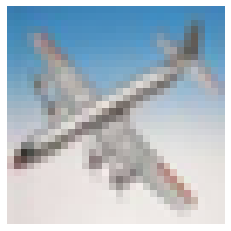

'airplane'

In [7]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import cv2
import tensorflow as tf
import numpy as np

img_path = "airplane.png"
# load the image
img = load_img(img_path)
# convert to numpy array
img_array = img_to_array(img)
plt.figure()
plt.imshow(img_array.astype(np.uint8))
plt.axis("off")
plt.show()   #our resized image (bigger than the previous)
#resize our image which is suitable for our model
img_array = cv2.resize(img_array,(48,48))


img_array = np.expand_dims(img_array, axis=0)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

predictions = model.predict(img_array)
maxProbIndice = np.argmax(predictions)
maxProbIndice

classes[maxProbIndice]